In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

# The resample function is used for resampling data, typically for dealing with imbalanced datasets by
# either oversampling the minority class or undersampling the majority class
# Not used in this notebook, but included for future reference
from sklearn.utils import resample

# These imports provide various techniques for oversampling imbalanced datasets from the imblearn.over_sampling module.
# Oversampling is used to increase the number of samples in the minority class to balance the dataset.
# I am only using RandomOverSampler in this notebook, but I have included others for future reference.
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

# The KNNImputer is used for imputing missing values in a dataset using the k-nearest neighbors approach
from sklearn.impute import KNNImputer

# The LabelEncoder is used for encoding categorical features into numeric values between 0 and n_classes-1 for models that require numeric inputs.
from sklearn.preprocessing import LabelEncoder
sns.set()



In [6]:
# For reading csv file using pandas library
data = pd.read_csv("hypothyroid.csv")

In [7]:
# Shape shows the tuple of (number of rows, number of columns) in dataset.
data.shape

(3772, 30)

In [8]:
# This will print top 5 value from the head of the dataset.
# I can also set a value inside head(value) to print specific number of rows to print.
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


# Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin value

referral_source - different sources of referals

Class - different types of thyroid

In [9]:
# this funtion describes the basic stats of the data
data.describe()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


Above, count row value is same for all the columns. I can notice some of the value used "?" where real value is missing. I can replace all of apearance of "?" with "nan" value, and then check for missing values again.

In [10]:
# Loop to find number of occorances of "?" within each column
for col in data.columns:
    count = data[col][data[col]== '?'].count()
    if count != 0:
        print(col, count)


age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


These are the columns with their number of missing values, which has been filled with "?"
I can see that column "TBG" is has all 3772 value filled with "?", which mean this column is useless.

In [11]:
# For dropping 'TBG' column
data = data.drop(['TBG'], axis=1)

Some columns using true or false to indicate weather next column has the value or not, For example:

In [12]:
# T4U_measured value indicates whether the T4U test was measured or not. If T4U_measured value is false then T4U value is '?'
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


So, I can drop these type of columns as well.

In [13]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [14]:
# Now let's replace the '?' values with numpy nan
for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count != 0:
        data[col] = data[col].replace('?',np.nan)    

In [15]:
# Loop to find number of occorances of "?" within each column and print if count is zero
for col in data.columns:
    count = data[col][data[col]== '?'].count()
    if count == 0:
        print(col, count)

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


As I can see, only 23 columns left after dropping useless columns and I have replaced "?" with "nan" value.

In [16]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

## Categorical values to numerical values
Before imputing missing values, I need to change categorical values to numerical values.
I will use dummies method to convert categorical values to numerical values when categorical value are more than 2. 

I will use mapping method to convert categorical values to numerical values when categorical value are 2, because if there are only two categories then the two columns formed after get dummies will both have very high correlation since they both explain the same thing. So I will have to drop one of the columns. That's why let's use mapping for such columns.

In [17]:
# sex column is the only categorical column with 'F' and 'M', rest use 'f' or 't'. I can map the categorical values like below:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [18]:
# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for col in data.columns:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

Now, I am left with 'referral_source' and 'Class' columns which are categorical and have more than 2 categories.

In [19]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [20]:

data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [21]:
# I will use get_dummies with that.
data = pd.get_dummies(data, columns=['referral_source'])

But, I need to use LabelEncoder for 'Class' column because it is our target column and I don't want to increase the number of columns in our dataset.

In [22]:
# label encoding the target variable 'Class' to convert it into numeric form
lblEncoder = LabelEncoder()
data['Class'] = lblEncoder.fit_transform(data['Class'])

In [23]:
# This will print top 5 value from the head of the dataset.
# I can also set a value inside head(value) to print specific number of rows to print.
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,False,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,False,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,False,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,False,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,False,False,False,True,False


In [24]:
# this funtion describes the basic stats of the data
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3003,3541,3385,3387,3772.000000,3772,3772,3772,3772,3772
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,241,146,234,NaN,2,2,2,2,2
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,100,NaN,False,False,False,False,True
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,238,71,95,73,NaN,3660,3386,3733,2738,2201
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,NaN,NaN,NaN,NaN,0.974814,NaN,NaN,NaN,NaN,NaN
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,NaN,NaN,NaN,NaN,0.279508,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


## Imputing missing values

In [25]:
# KNNImputer is used for imputing missing values in a dataset using the k-nearest neighbors approach
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [26]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.026776,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.785086,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

Let's check the distribution for our continous data in the dataset:

/var/folders/8j/ph_r3mbs0pg4f3_12c0xgr8c0000gn/T/ipykernel_39779/1119345341.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[col])
/var/folders/8j/ph_r3mbs0pg4f3_12c0xgr8c0000gn/T/ipykernel_39779/1119345341.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[col])
/var/fol

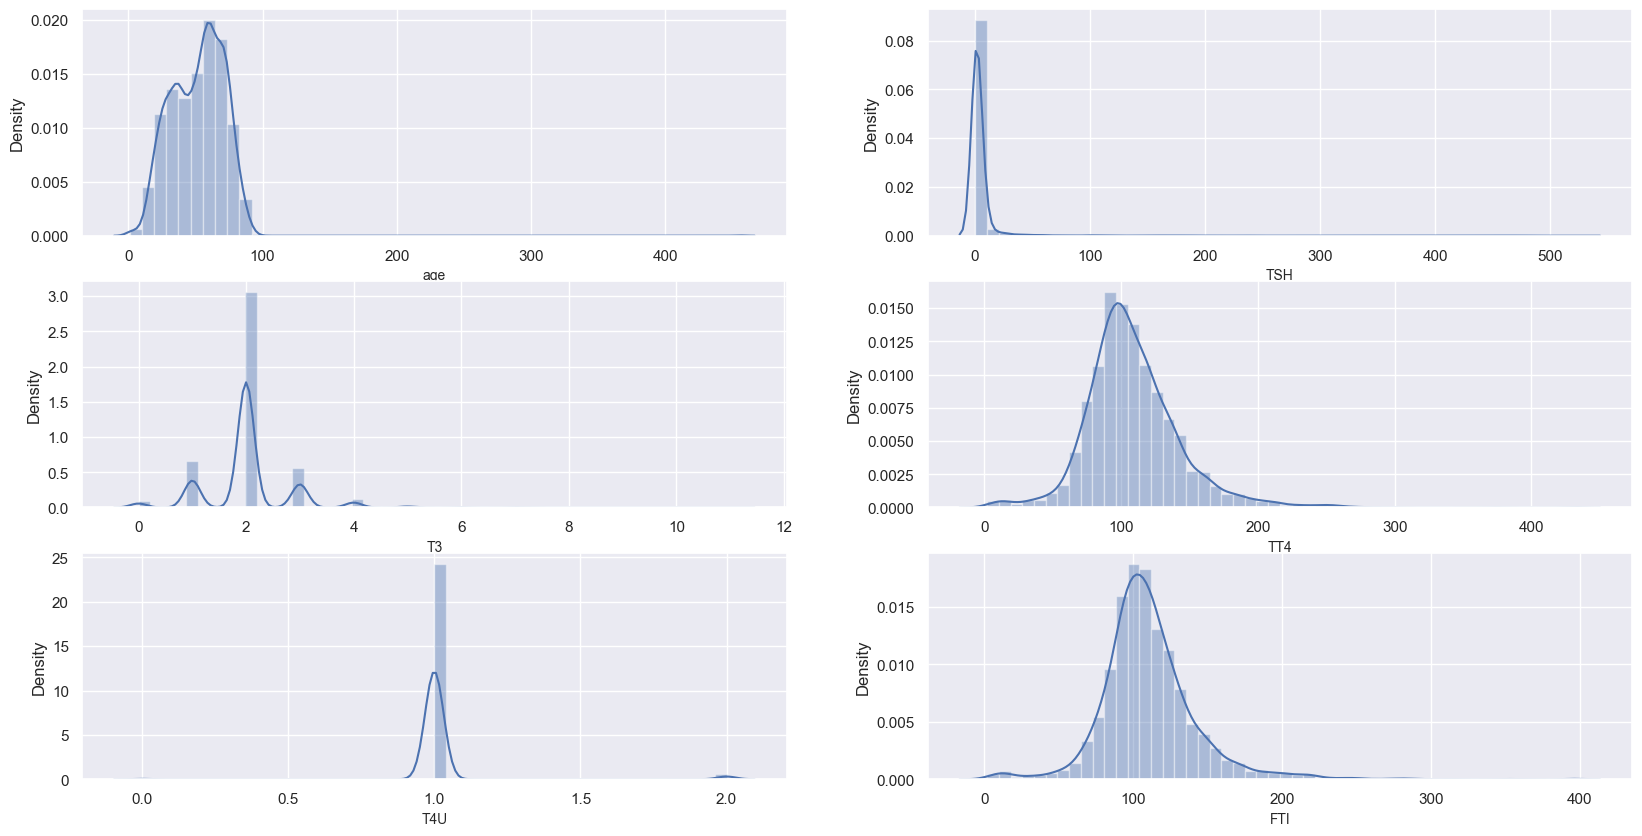

In [28]:
columns = ['age','TSH','T3','TT4','T4U','FTI']
# Create a new figure with a specific size and white background
fig = plot.figure(figsize=(20,10), facecolor='white')
# Initialize the plot number
plotno = 1

# Loop through each column
for col in columns:
    # Create a subplot at the current plot number
    ax = plot.subplot(3, 2, plotno)
    
    # Plot the distribution using seaborn's distplot
    sns.distplot(new_data[col])
    
    # Set the x-axis label to the current column name
    plot.xlabel(col, fontsize=10)
    
    # Increment the plot number for the next subplot
    plotno += 1

# Display the figure
plot.show()


## Data Transformation
The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.
I will use numpy log function to transform the data.


/var/folders/8j/ph_r3mbs0pg4f3_12c0xgr8c0000gn/T/ipykernel_39779/3208669328.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_data[col]))
/var/folders/8j/ph_r3mbs0pg4f3_12c0xgr8c0000gn/T/ipykernel_39779/3208669328.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_data

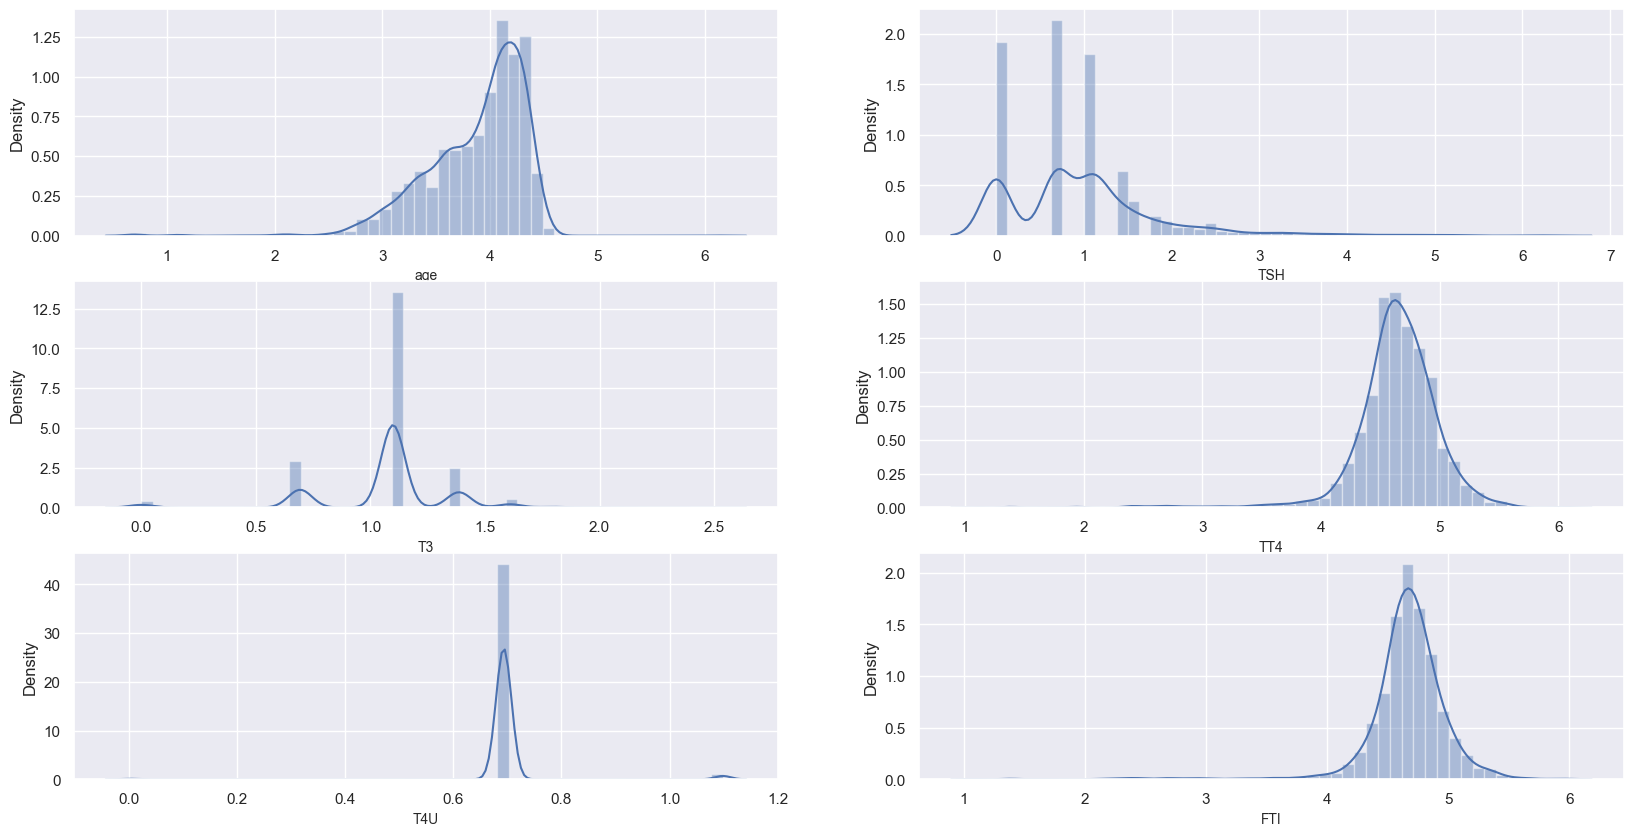

In [29]:
columns = ['age','TSH','T3','TT4','T4U','FTI']
# Create a new figure with a specific size and white background
fig = plot.figure(figsize=(20,10), facecolor='white')
# Initialize the plot number
plotno = 1

# Loop through each column
for col in columns:
    # Perform data transformation by adding 1 to each value
    new_data[col] += 1

    # Create a subplot at the current plot number
    ax = plot.subplot(3, 2, plotno)
    
    # Plot the distribution of the log-transformed data using seaborn's distplot
    sns.distplot(np.log(new_data[col]))
    
    # Set the x-axis label to the current column name
    plot.xlabel(col, fontsize=10)
    
    # Increment the plot number for the next subplot
    plotno += 1

# Display the figure
plot.show()


After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [30]:
new_data = new_data.drop(['TSH'],axis=1)

In [31]:
# to count the number of occurance of each class
new_data['Class'].value_counts()

Class
1.0    3481
0.0     194
2.0      95
3.0       2
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

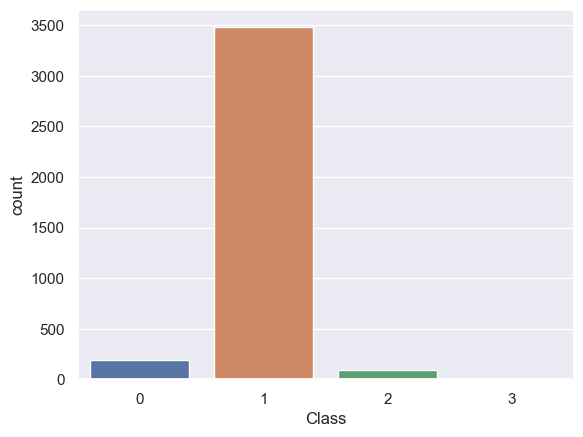

In [32]:
# to check how balanced our dataset in terms of given target classes:
sns.countplot(data=data, x='Class')






We can clearly see that the dataset is highly imbalanced. 

We will use a python library known as imbalanced-learn to deal with imbalanced data.
Imbalanced learn has an algorithm called RandomOverSampler. 

In [33]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdmsmplr = RandomOverSampler()
x_sampled,y_sampled  = rdmsmplr.fit_resample(x,y)

In [34]:
x_sampled.shape

(13924, 25)

In [35]:
# COnverting the sampled data into dataframe
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [36]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Class', ylabel='count'>

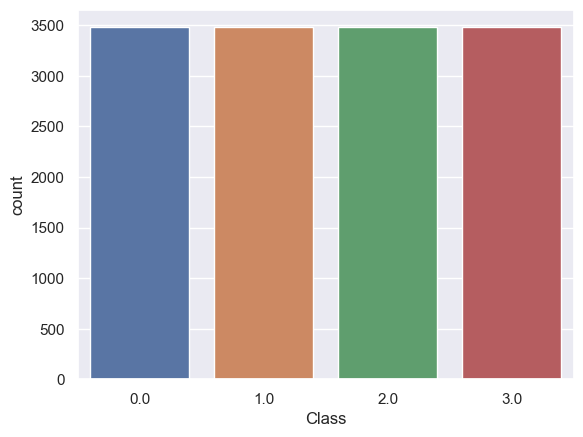

In [37]:
# Combine the sampled features and target into a new DataFrame
sampled_data = pd.concat([x_sampled, y_sampled], axis=1)

# Plot the count graph using sns.countplot()
sns.countplot(data=sampled_data, x='Class')

# Model Training

In [38]:
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [42]:
# Split the sampled data into training and testing sets
# (Assuming you have already imported train_test_split and split the data)
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.2, random_state=42)


In [44]:
# Define the hyperparameter grids for each classifier
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dt_params = {'max_depth': [None, 5, 10, 15]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}
xgb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1.0]}

In [48]:
# Initialize and train the classifiers model using grid search
classifiers = {
    'KNN': (KNeighborsClassifier(), knn_params),
    'Decision Tree': (DecisionTreeClassifier(), dt_params),
    'Random Forest': (RandomForestClassifier(), rf_params),
    'AdaBoost': (AdaBoostClassifier(), ada_params),
    'XGBoost': (XGBClassifier(), xgb_params)
}

In [58]:
for name, (model, params) in classifiers.items():
    print(f"Training {name}...")

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)
    grid_search.fit(x_train, y_train)

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters:", best_params)

    # Fit the best model to the training data
    best_model.fit(x_train, y_train)

    # Make probability predictions on the test set using the best model
    y_pred_proba = best_model.predict_proba(x_test)
    
    # Calculate evaluation metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    accuracy = accuracy_score(y_test, y_pred_proba.argmax(axis=1))

    # Print the evaluation results
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Accuracy Score: {accuracy}")
    print()

Training KNN...
Best Parameters: {'n_neighbors': 3}
ROC AUC Score: 0.988391255848805
Accuracy Score: 0.9626570915619389

Training Decision Tree...
Best Parameters: {'max_depth': None}
ROC AUC Score: 0.9886313359176642
Accuracy Score: 0.9831238779174147

Training Random Forest...
Best Parameters: {'max_depth': None, 'n_estimators': 100}
ROC AUC Score: 1.0
Accuracy Score: 0.992818671454219

Training AdaBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
ROC AUC Score: 0.8960482679873235
Accuracy Score: 0.7285457809694793

Training XGBoost...
Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 300}
ROC AUC Score: 0.9993442869654607
Accuracy Score: 0.9906642728904848



I am going to use random forest classifier to train our model, because it has ROC AUC score of 1.0 and accuracy of 0.99.

# Random Forest Classifier

In [59]:

randomForest_model = RandomForestClassifier(max_depth=None, n_estimators=100)
randomForest_model.fit(x_train, y_train)
y_pred = randomForest_model.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy using Random Forest: ", round(score, 1), "%" )

Accuracy using Random Forest:  99.2 %


## Model Evaluation

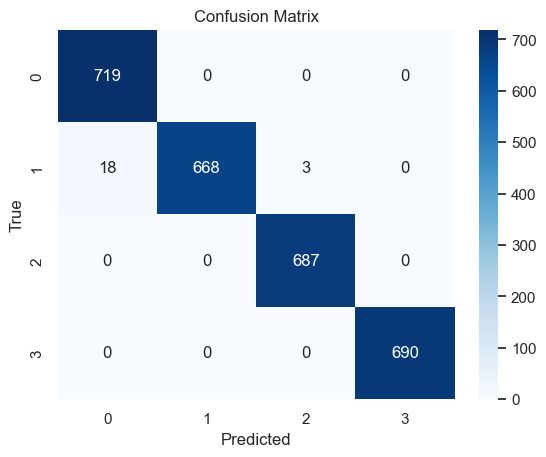

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       719
         1.0       1.00      0.97      0.98       689
         2.0       1.00      1.00      1.00       687
         3.0       1.00      1.00      1.00       690

    accuracy                           0.99      2785
   macro avg       0.99      0.99      0.99      2785
weighted avg       0.99      0.99      0.99      2785



In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plot.xlabel('Predicted')
plot.ylabel('True')
plot.title('Confusion Matrix')
plot.show()

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Confusion matrix shows:
The first row [719, 0, 0, 0] corresponds to the true labels of class 0. It means that the model correctly predicted all 719 instances of class 0, and there were no misclassifications for this class.

The second row [18, 668, 3, 0] corresponds to the true labels of class 1. It means that the model correctly predicted 668 instances of class 1, misclassified 18 instances of class 1 as class 0, misclassified 3 instances of class 1 as class 2, and did not misclassify any instances as class 3.

The third row [0, 0, 687, 0] corresponds to the true labels of class 2. It means that the model correctly predicted all 687 instances of class 2, and there were no misclassifications for this class.

The fourth row [0, 0, 0, 690] corresponds to the true labels of class 3. It means that the model correctly predicted all 690 instances of class 3, and there were no misclassifications for this class.

Classification report shows:
precision measures the accuracy of positive predictions. In the given report, for each class (0.0, 1.0, 2.0, 3.0), precision is calculated.

recall measures the model's ability to correctly identify positive instances. In the given report, recall is calculated for each class.

f2-score provides a balanced measure of the model's performance. In the given report, F1-score is calculated for each class.

Support represents the actual number of instances belonging to each class in the dataset.

Accuracy: Accuracy is the overall correctness of the model's predictions. It is calculated as the ratio of correct predictions to the total number of predictions made by the model.

Macro average: Macro average calculates the average performance of all classes, giving equal weight to each class.

Weighted average: Weighted average calculates the average performance of all classes, taking into account the number of instances in each class.
